# Segmentation des clients d'un site de e-commerce 

### Etapes du projet 
#### Tache 1 : Analyse exploratoire des données
#### Tache 2 : Analyse en composantes principales
#### Tache 3 : Clustering K-Means avec les méthodes du coude
#### La Segmentation des données dans le jargon du machine learning est : Le CLUSTERING

# Tache 1 : Analyse exploratoire des données

### Importation des librairies/fonctions et des données

In [156]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [157]:
# Importation des données
file = "Wholesale customers data.csv"
df = pd.read_csv(file)

In [158]:
# Cinq premières lignes
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel
1    298
2    142
Name: count, dtype: int64


<Axes: xlabel='Channel'>

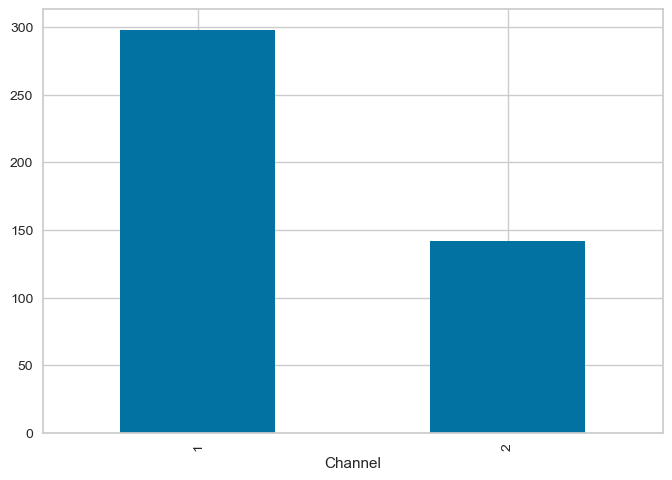

In [159]:
# Types de distribution
print(df["Channel"].value_counts())
df["Channel"].value_counts().plot(kind='bar')
# CHANNEL	Frequency
# Horeca	298
# Retail	142
# Total	    440

In [160]:
# Quelques changements de nom de variable et de modalités 
df.rename(columns={'Delicassen':'Delicatessen'}) # Delicatessen : épicerie fine
# Horeca : Hotel-Restaurant-Café
df["Channel"] = df["Channel"].map({1:'Horeca', 2:'Retail'}) # Retail: Vente au détail 
df["Region"] = df["Region"].map({1:'Lisbon', 2:'Porto', 3:'Other'})

In [161]:
# Table de fréquence de la variable 'Region'
df["Region"].value_counts()

Region
Other     316
Lisbon     77
Porto      47
Name: count, dtype: int64

In [162]:
# Table de fréquence normalisée
df["Region"].value_counts(normalize = True)

Region
Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [163]:
# Stockage des noms des colonnes dans une liste
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [164]:
# Résumé statistique
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [165]:
# Sauvegarde de df au format csv
df.to_csv('data_processed.csv')

In [166]:
# Importation du fichier 'data_processed.csv'
df = pd.read_csv('data_processed.csv', index_col = 0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [167]:
# Structure du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


In [168]:
df.shape

(440, 8)

In [169]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Pas de valeurs manquantes dans les données

### Visualisation des données

In [170]:
# features
print(df.dtypes)

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object


C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


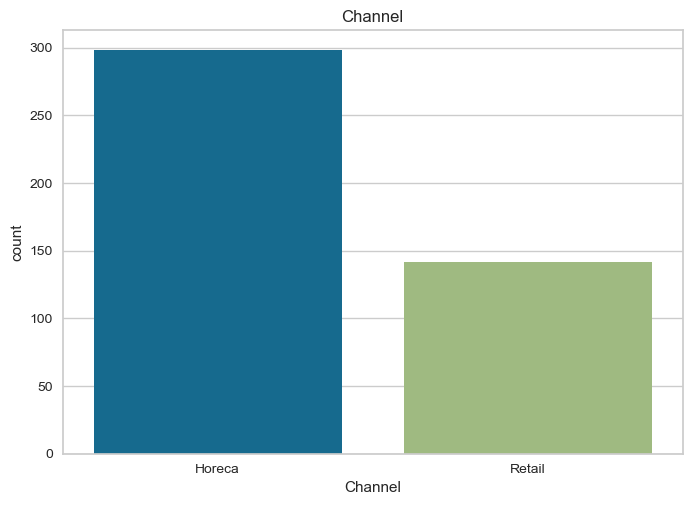

C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


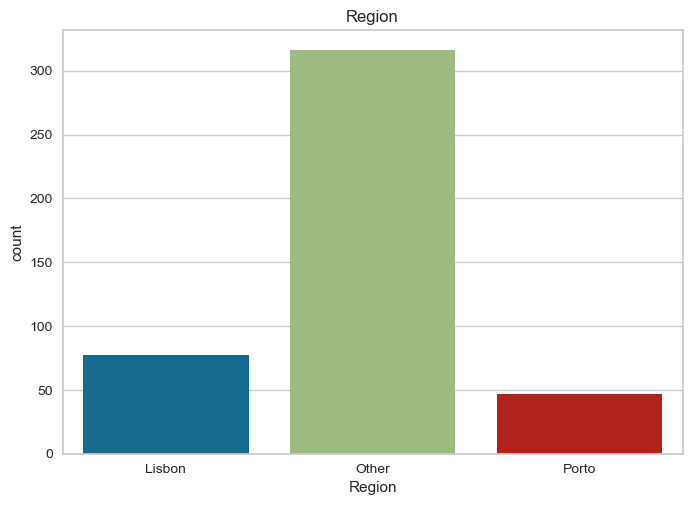

In [171]:
# Diagrammes à barres et histogrammes
# Convertir 'Channel' et 'Region' dans un format catégoriel
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')

# Loop through the features and plot
features = df.columns
for feature in features:
    if feature in ["Channel", "Region"]:
        sns.countplot(x=feature, data=df).set_title(feature)
        plt.show()
    else:
        # Your handling for other features if necessary
        pass

C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

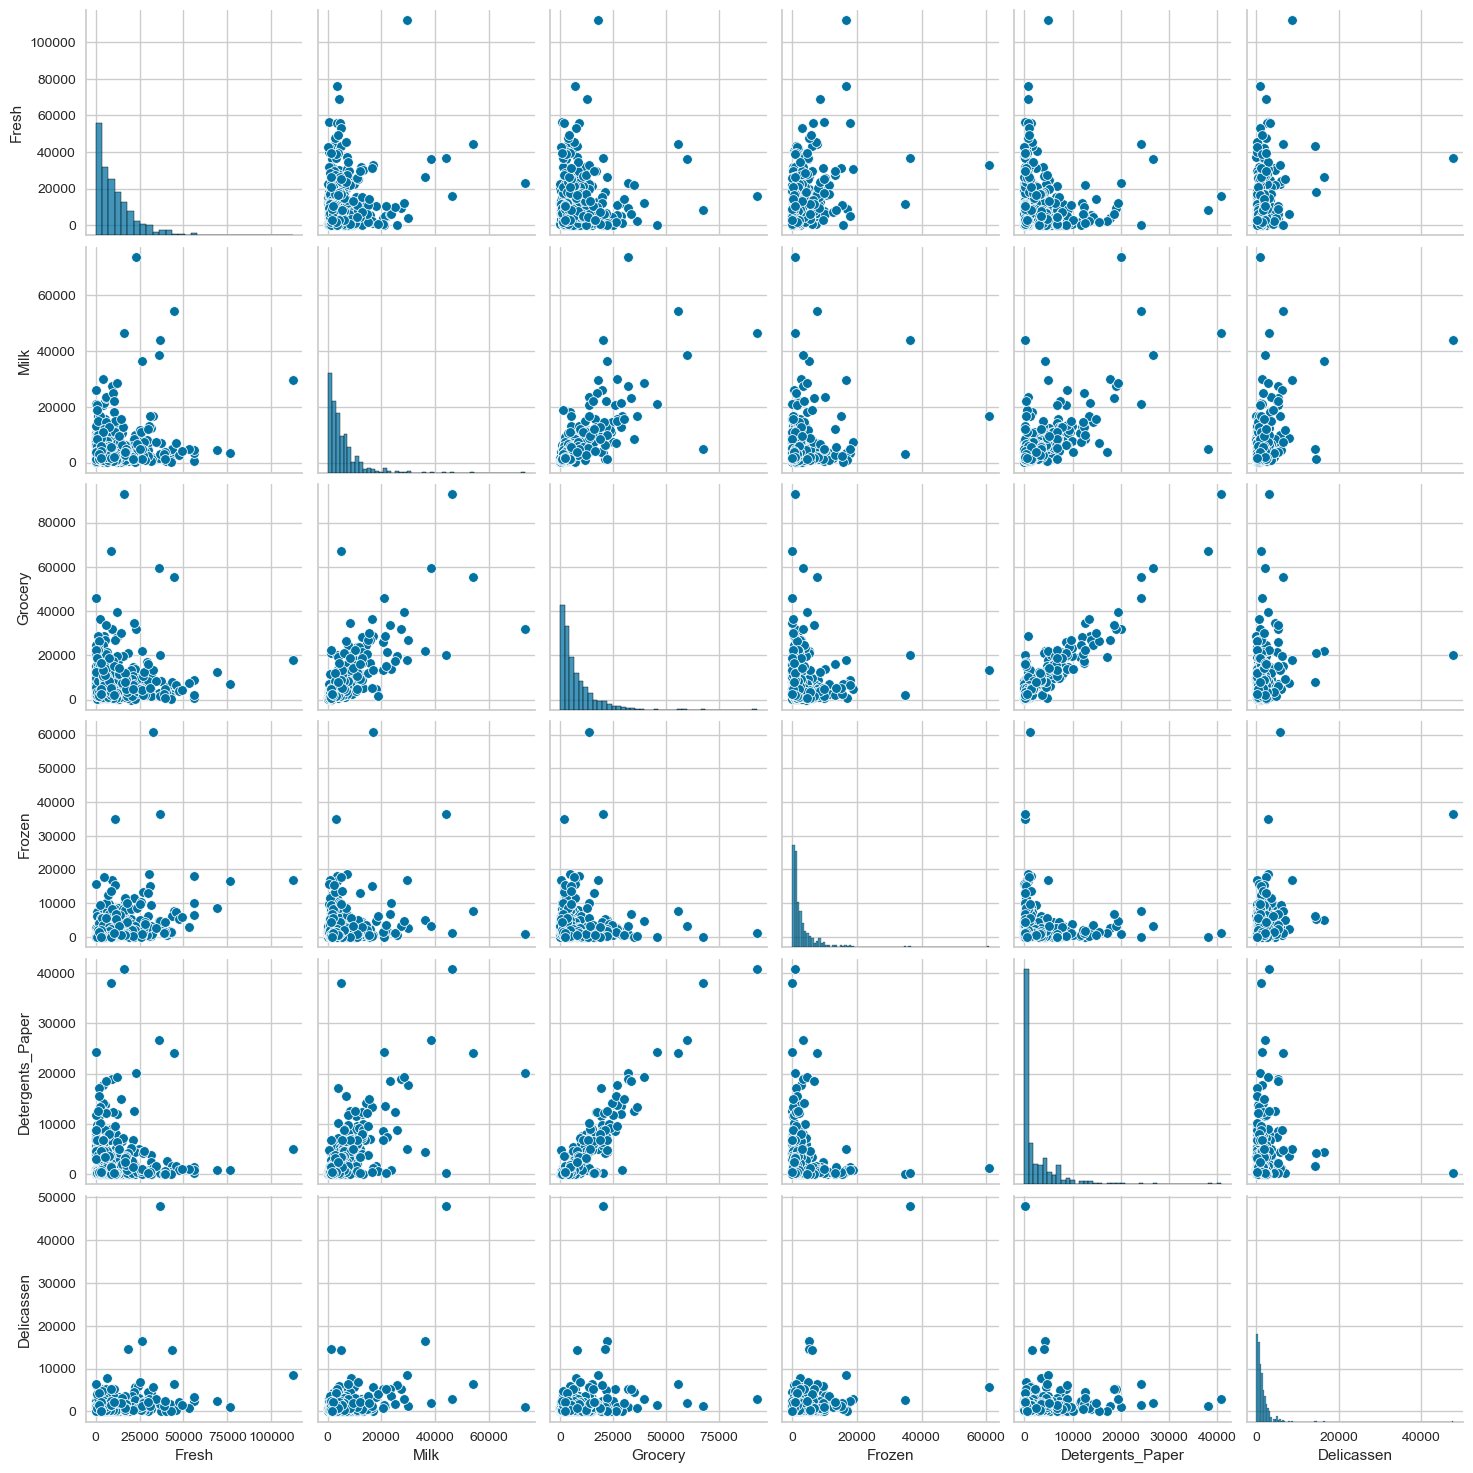

In [172]:
# Matrice de visualisation
sns.pairplot(df)

## Tache 2 : Analyse en composantes principales ACP

### Technique de réduction de dimensionnalité populaire, simple, facile à implémenter et donne de bons résultats

### Objectif : Réduire la dimmensionnalité du dataframe à 2 composantes principales afin de pouvoir visualiser le résultat dans un plan 2D

### ACP Linéaire

In [173]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844


In [174]:
# Dataframe des variables numériques de df
data = df.drop(['Channel','Region'], axis=1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [175]:
# Standardisation
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [176]:
# tableau du tableau numpy
np.save('training_data.npy', data)

In [177]:
# Application de l'ACP (2 composantes)
pca = PCA(n_components=2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [178]:
# Affichage du résultat
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

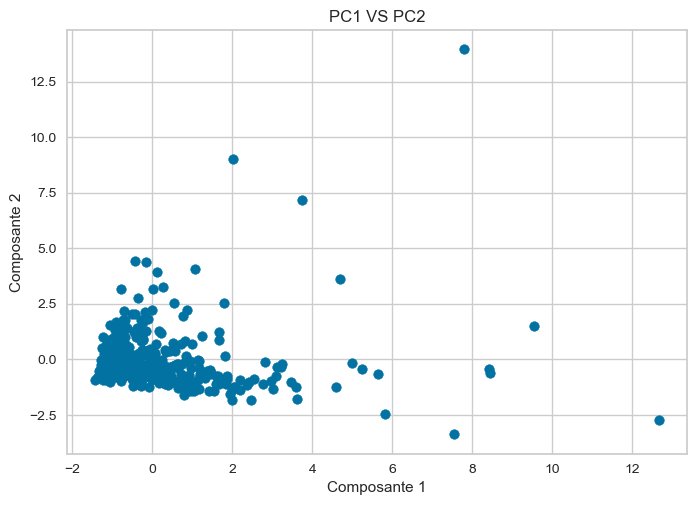

In [179]:
# Visualisation des composantes principales
plt.scatter(res_pca[:,0], res_pca[:,1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 VS PC2")
plt.show()

In [180]:
# Coefficient de corrélation de pearson obtenu après PCA
pearsonr(res_pca[:, 0], res_pca[:, 1])[0]

-3.3306690738754696e-16

### Le coefficient de corrélation étant très proche de 0, on en déduit qu' il n y a pas de corrélation entre les composantes.

### ACP non-linéaire

### L' ACP non-linéaire permet de faire une réduction non-linéaire de dimmensionnalité

In [181]:
# Chargement des données d'entrainement précédemment sauvegardé : 'training_data.npy'
data = np.load('training_data.npy')

In [182]:
# KPCA avec noyau 'rbf'
kpca = KernelPCA(n_components = 2, kernel='rbf')
res_kpca_rbf = kpca.fit_transform(data)
res_kpca_rbf

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

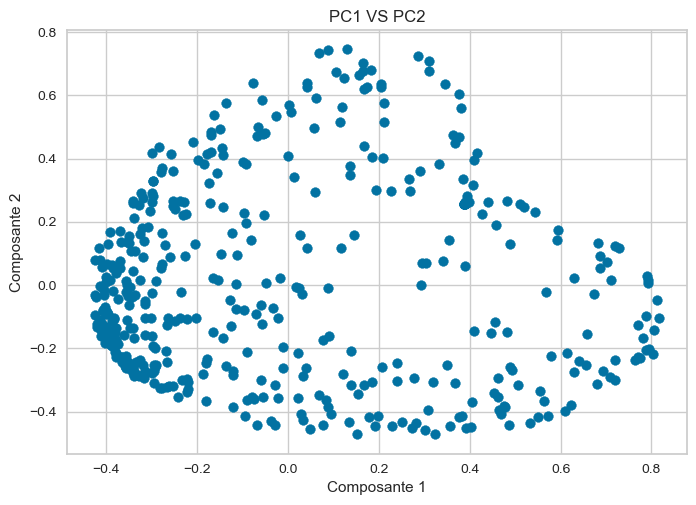

In [183]:
# Visualisation du nuage de points des deux composantes
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 VS PC2")
plt.show()

In [184]:
# Coefficient de corrélation de pearson obtenu après PCA (kernel = 'rbf')
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])[0]

-6.245004513516506e-17

In [185]:
# Comparaison des deux coefficients
pearsonr(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1])[0] < pearsonr(res_pca[:, 0], res_pca[:, 1])[0]
# On voit donc que l'ACP non-linéaire nous donne de meilleurs résultats

False

In [186]:
# Ajout des composantes principales comme colonnes de df
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

In [187]:
# 5 premières observations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,x_kpca_rbf,y_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,Horeca,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


## Tache 3 : Clustering K-Means avec les méthodes du coude

In [188]:
# Clustering avec 5 clusters 
cluster_model = KMeans(n_clusters = 5)
cluster_model.fit(res_kpca_rbf)
clusters = cluster_model.predict(res_kpca_rbf)

C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [189]:
# Affichage des clusters
clusters

array([2, 2, 1, 3, 1, 0, 0, 2, 0, 4, 2, 0, 1, 4, 1, 0, 2, 0, 1, 0, 3, 0,
       1, 1, 1, 0, 0, 0, 4, 1, 3, 0, 3, 1, 0, 2, 1, 4, 4, 1, 1, 3, 4, 4,
       2, 4, 4, 1, 2, 4, 0, 0, 1, 2, 3, 0, 1, 4, 0, 2, 2, 1, 2, 4, 0, 1,
       2, 2, 0, 0, 3, 1, 3, 3, 2, 3, 0, 4, 0, 0, 0, 4, 2, 3, 0, 1, 1, 1,
       3, 3, 0, 3, 1, 1, 2, 0, 2, 0, 0, 3, 4, 4, 2, 1, 0, 3, 2, 4, 2, 4,
       0, 4, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 2, 1, 1, 3, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 4, 3, 2, 4, 2, 0, 3, 4, 2, 4, 2, 0, 0, 0, 4, 4, 2, 4, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 3, 0, 0, 4, 0, 3, 1, 2,
       0, 0, 4, 4, 1, 0, 0, 4, 0, 2, 2, 4, 3, 1, 0, 2, 2, 4, 4, 3, 4, 0,
       3, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 2, 3, 0, 3, 0, 0, 3, 0, 1, 1, 3,
       3, 0, 2, 4, 0, 3, 0, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 1, 0, 3, 3, 0,
       4, 1, 4, 3, 4, 3, 0, 0, 2, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 1, 1, 1,
       0, 3, 3, 1, 0, 0, 0, 4, 3, 0, 3, 0, 2, 0, 0,

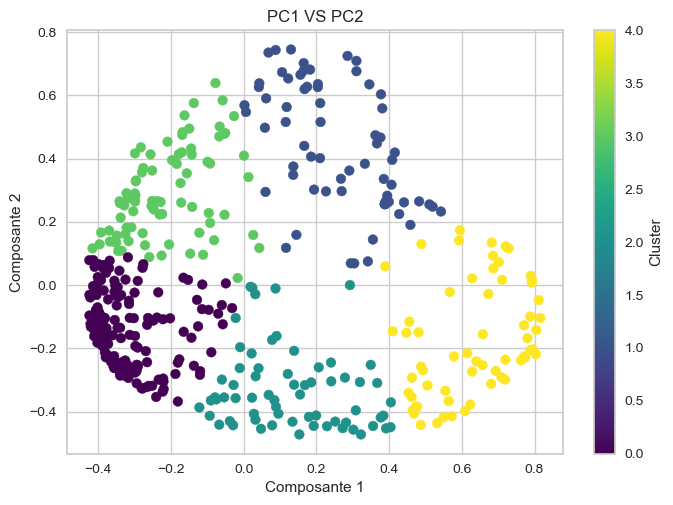

In [190]:
# Visualisation des clusters 
plt.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], c = clusters, cmap='viridis')
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 VS PC2")

plt.colorbar(label='Cluster')
plt.show()

C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

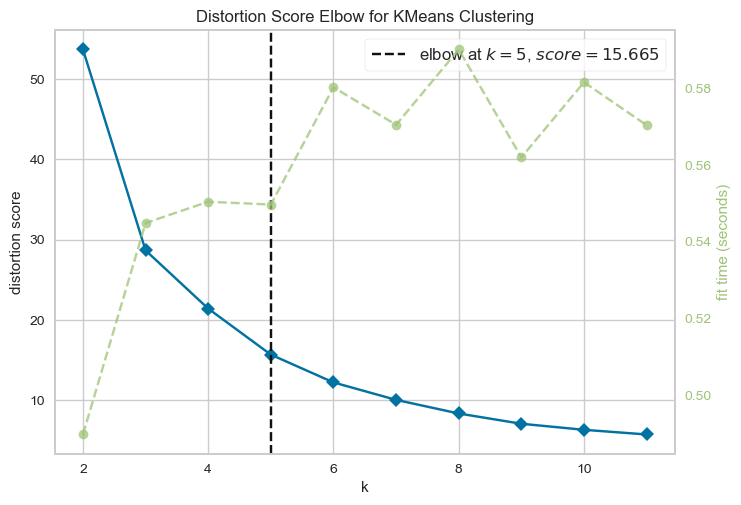

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [191]:
# Méthode du coude
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,12))
visualizer.fit(res_kpca_rbf)
visualizer.show()

In [192]:
# Ajout des clusters à df et sauvegarder au format CSV
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')

In [193]:
# Chargement des données
df = pd.read_csv('data_with_clusters.csv', index_col=0)

In [194]:
# Affichage des 5 premieres observations
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,x_kpca_rbf,y_kpca_rbf,cluster_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,2
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,2
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,1
3,Horeca,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,1


In [195]:
df['cluster_kpca_rbf'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [199]:
features

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [208]:
# Centroides
numerical_features = features.drop(['Channel', 'Region'])
df.groupby('cluster_kpca_rbf')[numerical_features].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_kpca_rbf,,,,,,
0,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830
1,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
2,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308
3,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481
4,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290


In [209]:
df.groupby(['cluster_kpca_rbf', 'Channel', 'Region'])[numerical_features].mean()

Fresh          Milk       Grocery  \
cluster_kpca_rbf Channel Region                                             
0                Horeca  Lisbon   6580.461538   2444.615385   2693.269231   
                         Other    6021.242991   2297.859813   2595.775701   
                         Porto    7070.600000   1708.266667   4009.933333   
                 Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                         Other   11887.428571   4446.714286   5953.571429   
                         Porto   10708.666667   3779.666667   6193.333333   
1                Horeca  Lisbon  31168.666667   9313.333333   7786.666667   
                         Other   34887.564103   6569.153846   5962.948718   
                         Porto   16360.000000   8558.500000  10323.500000   
                 Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                         Other   23057.333333  22303.388889  25736.555556   
                         Porto   17490.000000   4241.666667  26943.666667   
2                Horeca  Lisbon   3218.333333   7438.166667   7476.500000   
                         Other    3332.312500   5690.250000   8992.187500   
                 Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                         Other    6374.567568   7013.243243  10133.918919   
                         Porto    3295.666667   7600.333333   9534.000000   
3                Horeca  Lisbon  16912.176471   1504.000000   2178.823529   
                         Other   18005.255319   2370.978723   2898.021277   
                         Porto   17039.636364   1979.818182   3843.454545   
                 Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                         Other   17521.500000   4948.500000   6342.500000   
4                Horeca  Lisbon   2806.000000  10765.000000  15538.000000   
                         Other   11908.500000  15602.500000  14858.000000   
                 Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                         Other    5849.205128  11311.128205  19740.820513   
                         Porto    4402.300000  12776.000000  18218.700000   

                                       Frozen  Detergents_Paper   Delicassen  
cluster_kpca_rbf Channel Region                                               
0                Horeca  Lisbon   1858.769231        860.153846   621.769231  
                         Other    1663.766355        499.775701   908.700935  
                         Porto    1986.000000        444.933333   775.200000  
                 Retail  Lisbon   5612.000000        788.000000  1360.000000  
                         Other     954.857143       2626.000000   727.571429  
                         Porto     898.666667       2860.666667   930.000000  
1                Horeca  Lisbon   7238.666667        739.444444  2997.555556  
                         Other    9338.282051        859.282051  3836.794872  
                         Porto   38235.000000        643.500000  3079.500000  
                 Retail  Lisbon   5741.000000      19002.000000  3995.500000  
                         Other    2316.277778      11587.833333  3950.888889  
                         Porto    4351.666667      14181.666667  2280.000000  
2                Horeca  Lisbon   1071.666667       2718.500000   960.000000  
                         Other    1080.687500       3090.312500  1139.812500  
                 Retail  Lisbon   1662.000000       5195.666667   793.000000  
                         Other    1306.621622       4179.351351  1342.108108  
                         Porto     699.000000       4894.333333   601.000000  
3                Horeca  Lisbon   3719.529412        289.588235  1137.647059  
                         Other    4368.574468        514.808511  1026.404255  
                         Porto    4963.727273        505.000000  1198.000000  
                 Retail  Lisbon   5040.000000       1761.500000  184